<a href="https://colab.research.google.com/github/shravya-nallamilli/CFG-data-project/blob/main/cfg_temperature_data_project_brenda_louise_shravya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install meteostat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

from meteostat import Point, Monthly

# Set time period - 3 years before, during and after covid
start = datetime(2016, 6, 7)
end = datetime(2024, 6, 7)

# Create Point for London, Swansea and Preston
london = Point(51.5072, 0.1276, 50)
swansea = Point (51.6208, -3.9432)
preston = Point (53.7628, -2.7045)

# Get monthly data
london_monthly_data = Monthly(london, start, end)
london_monthly_data = london_monthly_data.fetch()

swansea_monthly_data = Monthly(swansea, start, end)
swansea_monthly_data = swansea_monthly_data.fetch()

preston_monthly_data = Monthly(preston, start, end)
preston_monthly_data = preston_monthly_data.fetch()

regional_data = [london_monthly_data, swansea_monthly_data, preston_monthly_data]


In [ ]:
#Lets Clean Up the Data!

for details in regional_data:
  details.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2016-12-01 to 2024-04-01
Freq: MS
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tavg    70 non-null     float64
 1   tmin    70 non-null     float64
 2   tmax    70 non-null     float64
 3   prcp    35 non-null     float64
 4   wspd    70 non-null     float64
 5   pres    64 non-null     float64
 6   tsun    0 non-null      float64
dtypes: float64(7)
memory usage: 5.6 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 95 entries, 2016-06-01 to 2024-04-01
Freq: MS
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tavg    77 non-null     float64
 1   tmin    77 non-null     float64
 2   tmax    77 non-null     float64
 3   prcp    34 non-null     float64
 4   wspd    61 non-null     float64
 5   pres    70 non-null     float64
 6   tsun    0 non-null      float64
dtypes: float64(7)
memory usage:

In [ ]:
for regions in regional_data:
  regions.rename(columns={'time':'date','tavg':'average_temp','tmin': 'minimum_temp', 'tmax':'maximum_temp'}, inplace=True)
  regions.drop(columns=['wspd','pres','minimum_temp','tsun'], inplace=True)
  regions.sort_index()
  regions["maximum_temp"] = regions["maximum_temp"].replace({np.nan: regions["maximum_temp"].mean()})
  regions["average_temp"] = regions["average_temp"].replace({np.nan: regions["average_temp"].mean()})
  regions["prcp"] = regions["prcp"].replace({np.nan: regions["prcp"].mean()})

print(regions.round(1))


            average_temp  maximum_temp   prcp
time                                         
2016-07-01          16.4          18.7   95.2
2016-08-01          16.4          19.2   95.2
2016-09-01          15.9          18.5   95.2
2016-10-01          11.2          13.9   95.2
2016-11-01          11.2          13.9   95.2
...                  ...           ...    ...
2023-12-01           7.2           8.9  146.2
2024-01-01           5.7           7.8  111.0
2024-02-01           7.3           9.3  106.5
2024-03-01          11.2          13.9   95.2
2024-04-01           9.5          12.0   96.3

[94 rows x 3 columns]


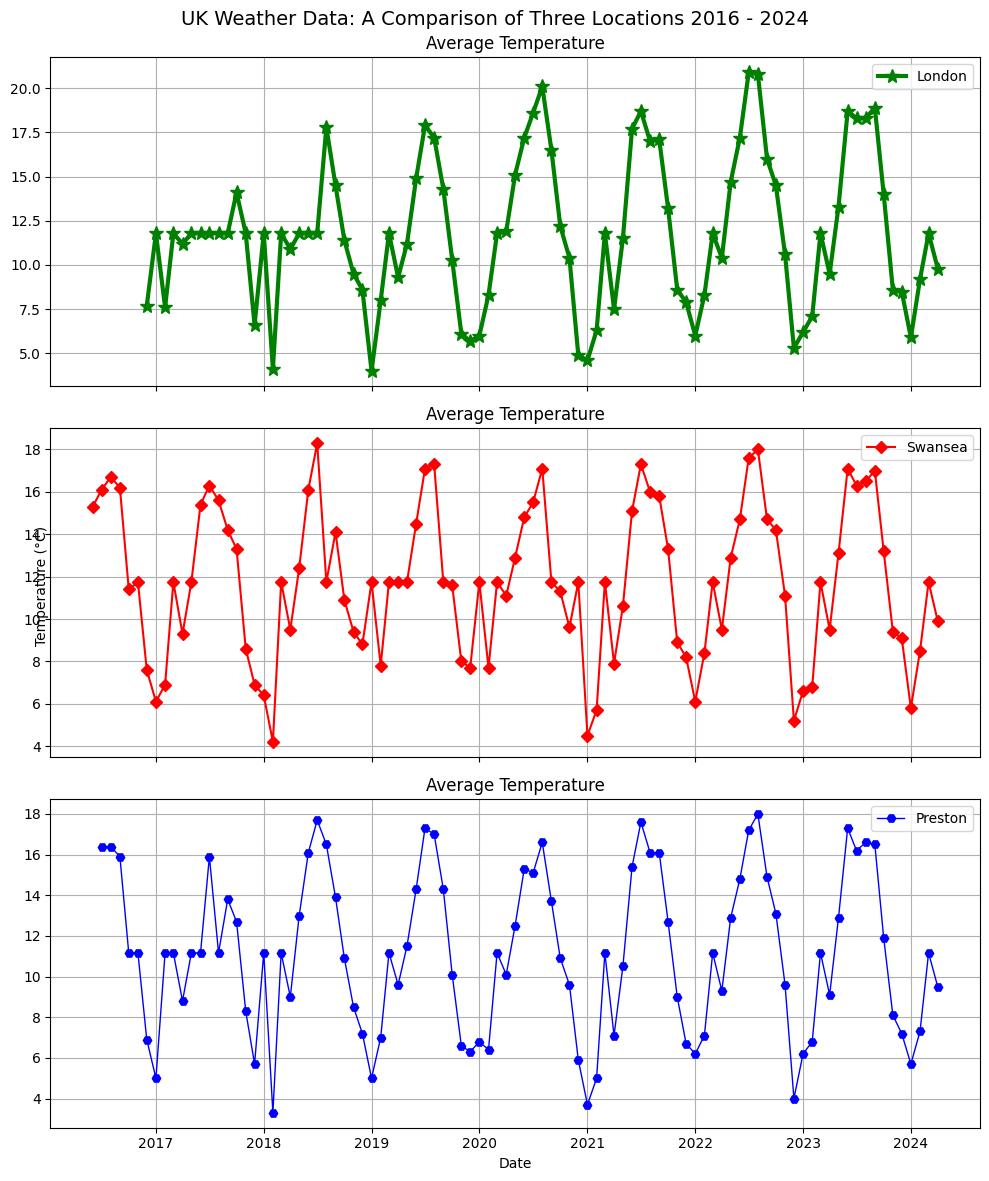

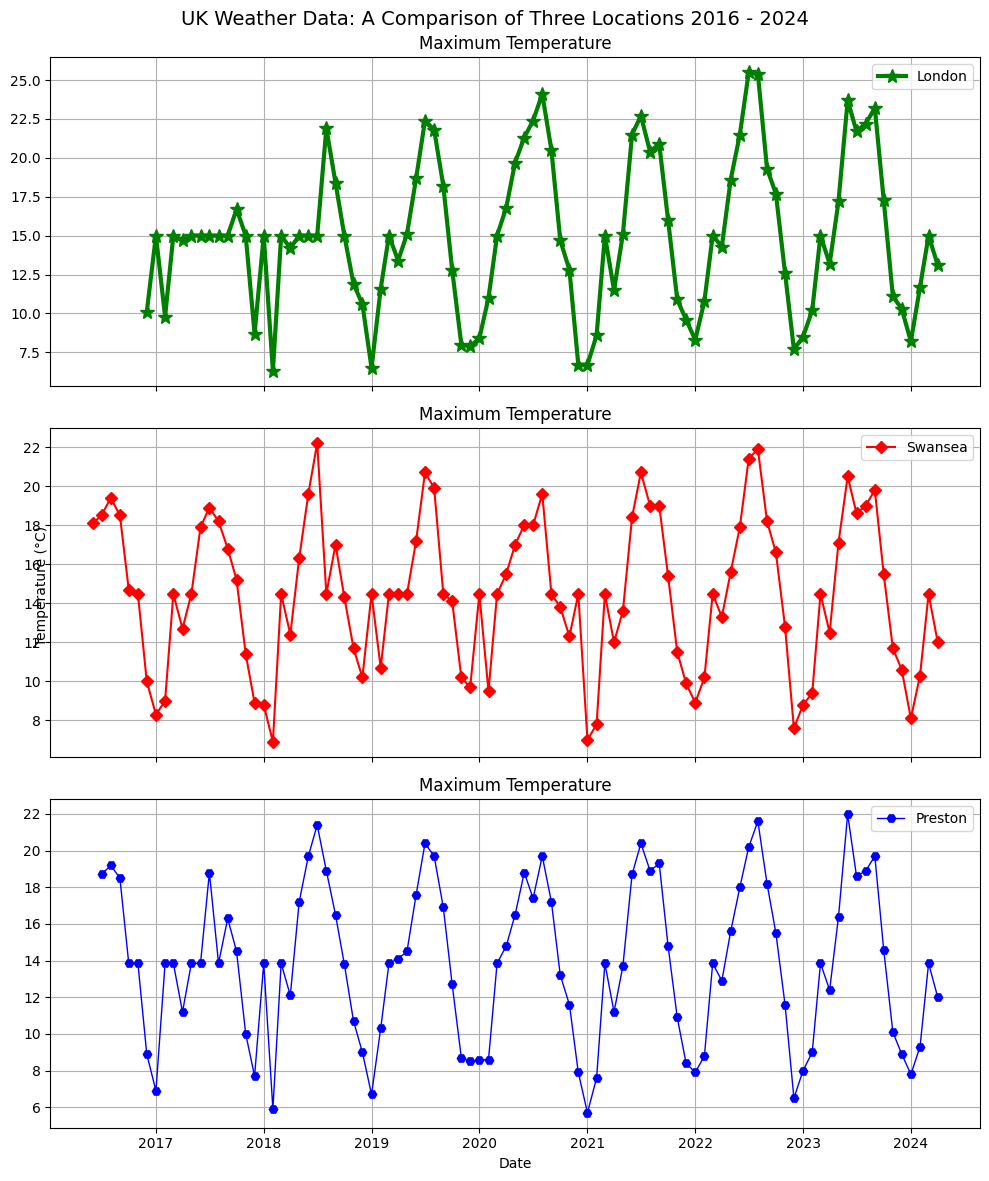

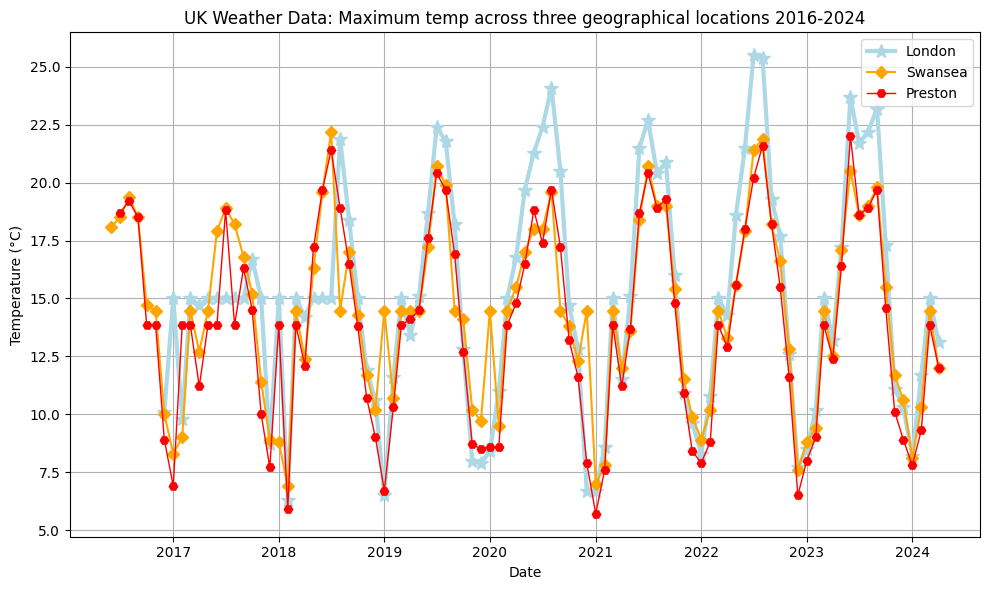

In [ ]:
# Create a figure with three vertically arranged subplots to illustrate Average temperature
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Plot London in the first subplot
axes[0].plot(london_monthly_data.index, london_monthly_data['average_temp'], label='London', linestyle='-', marker='*', color='green', lw=3, ms=10)
axes[0].set_title('Average Temperature')

# Plot Swansea in the second subplot
axes[1].plot(swansea_monthly_data.index, swansea_monthly_data['average_temp'], label='Swansea', linestyle='-', marker='D', color='red')
axes[1].set_title('Average Temperature')

# Plot Preston in the third subplot
axes[2].plot(preston_monthly_data.index, preston_monthly_data['average_temp'], label='Preston', linestyle='-', marker='H', color='blue', lw=1)
axes[2].set_title('Average Temperature')

# Common x-axis label
fig.suptitle('UK Weather Data: A Comparison of Three Locations 2016 - 2024', fontsize=14)
plt.xlabel('Date')

# Common y-axis label
fig.text(0.04, 0.5, 'Temperature (°C)', va='center', rotation='vertical')

# Add legends and grids to each subplot
for ax in axes:
    ax.legend()
    ax.grid(True)

# Adjust subplot spacing
plt.tight_layout()


# Create a figure with three vertically arranged subplots to illustrate Maximum temperature
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Plot London in the first subplot
axes[0].plot(london_monthly_data.index, london_monthly_data['maximum_temp'], label='London', linestyle='-', marker='*', color='green', lw=3, ms=10)
axes[0].set_title('Maximum Temperature')

# Plot Swansea in the second subplot
axes[1].plot(swansea_monthly_data.index, swansea_monthly_data['maximum_temp'], label='Swansea', linestyle='-', marker='D', color='red')
axes[1].set_title('Maximum Temperature')

# Plot Preston in the third subplot
axes[2].plot(preston_monthly_data.index, preston_monthly_data['maximum_temp'], label='Preston', linestyle='-', marker='H', color='blue', lw=1)
axes[2].set_title('Maximum Temperature')

# Common x-axis label
fig.suptitle('UK Weather Data: A Comparison of Three Locations 2016 - 2024', fontsize=14)
plt.xlabel('Date')

# Common y-axis label
fig.text(0.04, 0.5, 'Temperature (°C)', va='center', rotation='vertical')

# Add legends and grids to each subplot
for ax in axes:
    ax.legend()
    ax.grid(True)

# Adjust subplot spacing
plt.tight_layout()


# Try to create a plot with all three maximum temperature datasets on one graph
plt.figure(figsize=(10, 6))

# Plot London data
plt.plot(london_monthly_data.index, london_monthly_data['maximum_temp'], label='London', linestyle='-', marker='*', color='lightblue', lw = 3, ms = 10)

# Plot Swansea
plt.plot(swansea_monthly_data.index, swansea_monthly_data['maximum_temp'], label='Swansea', linestyle='-', marker='D', color='orange')

# Plot Preston
plt.plot(preston_monthly_data.index, preston_monthly_data['maximum_temp'], label='Preston', linestyle='-', marker='H', color='red', lw = 1)

plt.title('UK Weather Data: Maximum temp across three geographical locations 2016-2024')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

plt.legend()
plt.grid(True)
plt.tight_layout()

# Try to create a plot with all three precipitation datasets on one graph
plt.show()






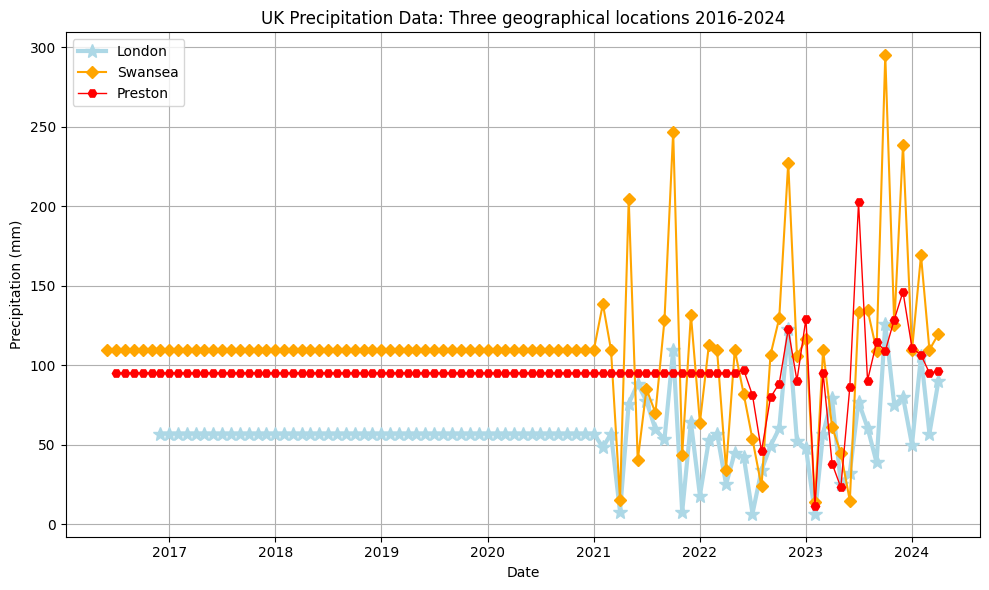

In [ ]:
# Try to create a plot with all three precipitation datasets on one graph
plt.figure(figsize=(10, 6))

#plot London, Swansea and Preston temp
plt.plot(london_monthly_data.index, london_monthly_data['prcp'], label='London', linestyle='-', marker='*', color='lightblue', lw=3, ms=10)
plt.plot(swansea_monthly_data.index, swansea_monthly_data['prcp'], label='Swansea', linestyle='-', marker='D', color='orange')
plt.plot(preston_monthly_data.index, preston_monthly_data['prcp'], label='Preston', linestyle='-', marker='H', color='red', lw=1)

#adding titles and labels
plt.title('UK Precipitation Data: Three geographical locations 2016-2024')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')

#adding legend
plt.legend()

#adding grid
plt.grid(True)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()
